In [3]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

#importing the file
df=pd.read_csv("Summer-Olympic-medals-1976-to-2008.csv",encoding='latin-1')

#checking the information
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15433 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15316 non-null  object 
 1   Year          15316 non-null  float64
 2   Sport         15316 non-null  object 
 3   Discipline    15316 non-null  object 
 4   Event         15316 non-null  object 
 5   Athlete       15316 non-null  object 
 6   Gender        15316 non-null  object 
 7   Country_Code  15316 non-null  object 
 8   Country       15316 non-null  object 
 9   Event_gender  15316 non-null  object 
 10  Medal         15316 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.3+ MB


,Year
count,15316.000000
mean,1993.620789
std,10.159851
min,1976.000000
25%,1984.000000
50%,1996.000000
75%,2004.000000
max,2008.000000


In [2]:
# print top 5 entries 
df.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


In [3]:
df.describe()

,Year
count,15316.000000
mean,1993.620789
std,10.159851
min,1976.000000
25%,1984.000000
50%,1996.000000
75%,2004.000000
max,2008.000000


In [4]:
 #checking the duplicate values 
df['Athlete'].duplicated().sum()

np.int64(4095)

In [5]:
# Check for duplicated rows
duplicates = df[df.duplicated()]
print(duplicates) 

        City    Year   Sport Discipline   Event       Athlete Gender  \
771      NaN     NaN     NaN        NaN     NaN           NaN    NaN   
772      NaN     NaN     NaN        NaN     NaN           NaN    NaN   
773      NaN     NaN     NaN        NaN     NaN           NaN    NaN   
774      NaN     NaN     NaN        NaN     NaN           NaN    NaN   
775      NaN     NaN     NaN        NaN     NaN           NaN    NaN   
...      ...     ...     ...        ...     ...           ...    ...   
883      NaN     NaN     NaN        NaN     NaN           NaN    NaN   
884      NaN     NaN     NaN        NaN     NaN           NaN    NaN   
885      NaN     NaN     NaN        NaN     NaN           NaN    NaN   
886      NaN     NaN     NaN        NaN     NaN           NaN    NaN   
2320  Moscow  1980.0  Hockey     Hockey  hockey  SINGH, Singh    Men   

     Country_Code Country Event_gender Medal  
771           NaN     NaN          NaN   NaN  
772           NaN     NaN          NaN   

In [6]:
df = df.drop_duplicates(keep='first')

In [7]:
#checking the null vaslues
df.isnull().sum()

#deleting the null values
df=df.dropna()

In [8]:
df.isnull().sum()

City            0
Year            0
Sport           0
Discipline      0
Event           0
Athlete         0
Gender          0
Country_Code    0
Country         0
Event_gender    0
Medal           0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15315 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15315 non-null  object 
 1   Year          15315 non-null  float64
 2   Sport         15315 non-null  object 
 3   Discipline    15315 non-null  object 
 4   Event         15315 non-null  object 
 5   Athlete       15315 non-null  object 
 6   Gender        15315 non-null  object 
 7   Country_Code  15315 non-null  object 
 8   Country       15315 non-null  object 
 9   Event_gender  15315 non-null  object 
 10  Medal         15315 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.4+ MB


In [10]:
df.columns

Index(['City', 'Year', 'Sport', 'Discipline', 'Event', 'Athlete', 'Gender',
       'Country_Code', 'Country', 'Event_gender', 'Medal'],
      dtype='object')

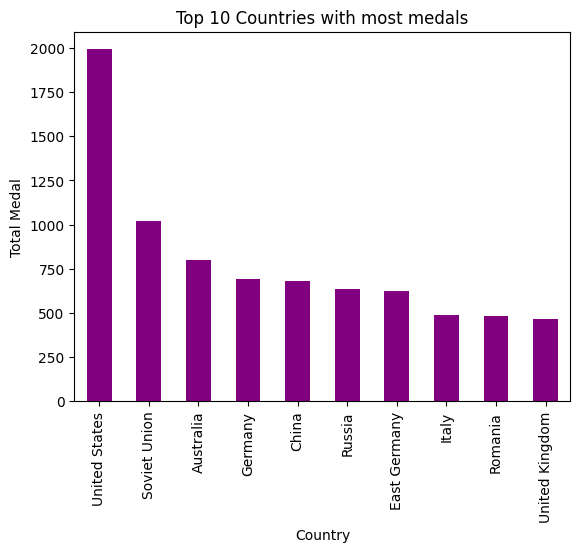

In [11]:
#total medals by each country
medals_by_countries=df.groupby('Country')['Medal'].count().sort_values(ascending=False)

medals_by_countries.head(10).plot(kind='bar',color='purple')
plt.title("Top 10 Countries with most medals")
plt.xlabel("Country")
plt.ylabel("Total Medal")
plt.show()

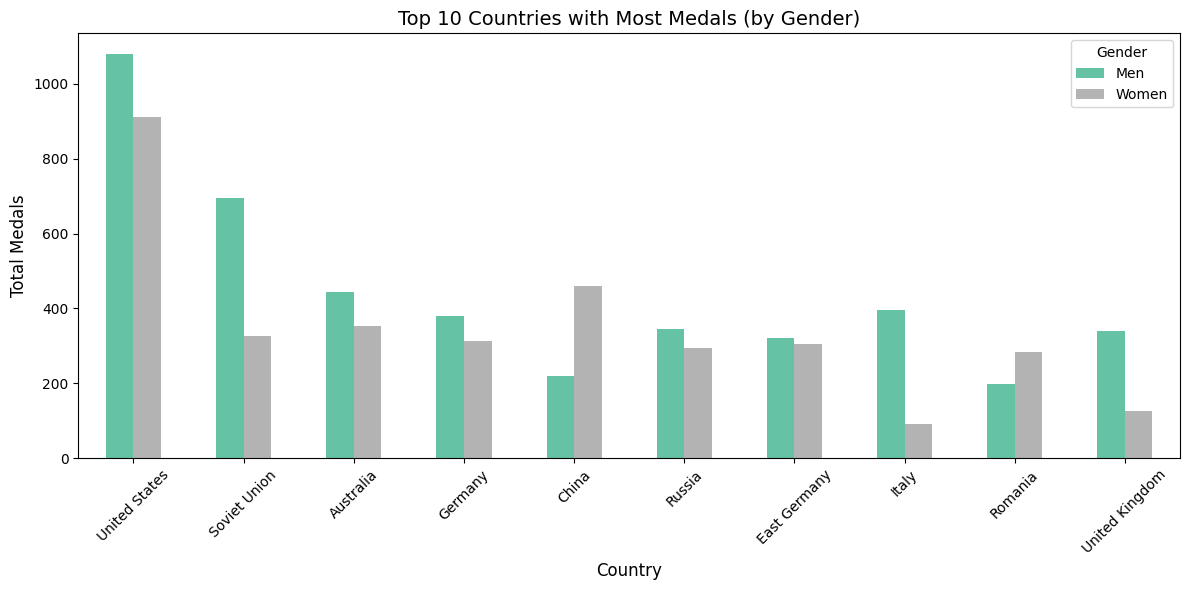

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by Country and Gender, count medals
medals_gender_country = df.groupby(['Country', 'Gender'])['Medal'].count().reset_index()

# Pivot the data to get Gender as columns
pivot_df = medals_gender_country.pivot(index='Country', columns='Gender', values='Medal').fillna(0)

# Get top 10 countries by total medals
pivot_df['Total'] = pivot_df.sum(axis=1)
top_10 = pivot_df.sort_values(by='Total', ascending=False).head(10).drop(columns='Total')

# Plot grouped bar chart
top_10.plot(kind='bar', figsize=(12, 6), colormap='Set2')

plt.title("Top 10 Countries with Most Medals (by Gender)", fontsize=14)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Total Medals", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


C:\Users\dugar\AppData\Local\Temp\ipykernel_4388\3558623093.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top['Country'] = pd.Categorical(df_top['Country'], categories=country_order, ordered=True)


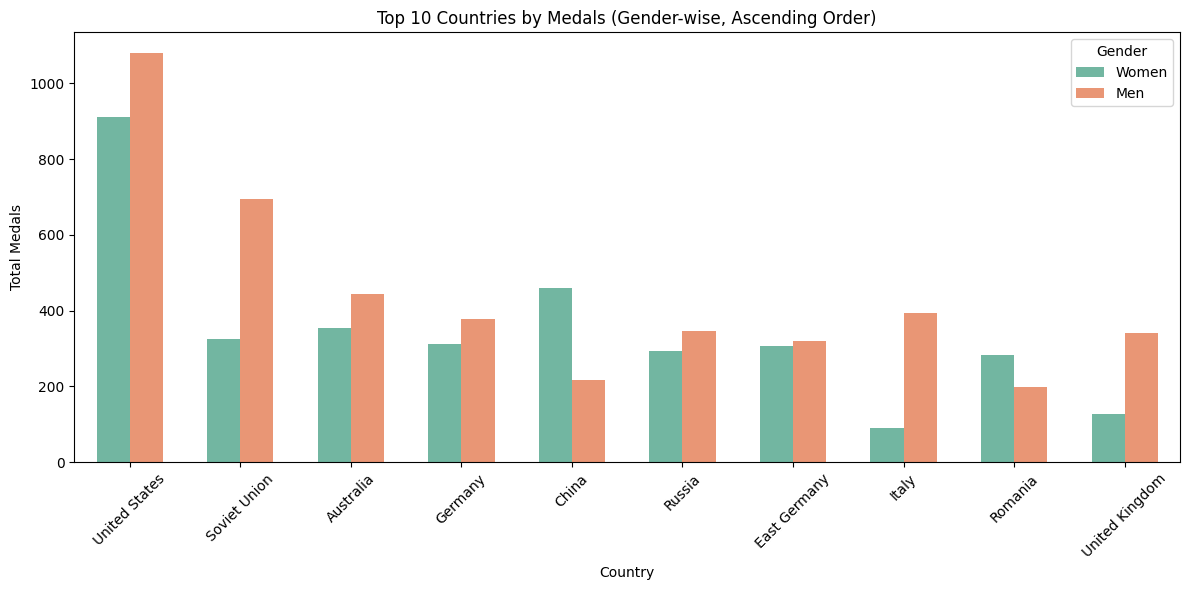

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Get top 10 countries by total medals
top_countries = df['Country'].value_counts().head(10).index

# Step 2: Filter for top countries only
df_top = df[df['Country'].isin(top_countries)]

# Step 3: Sort countries by total medal count (ascending)
country_order = df_top['Country'].value_counts().sort_values(ascending=False).index

# Step 4: Make 'Country' a categorical variable with sorted order
df_top['Country'] = pd.Categorical(df_top['Country'], categories=country_order, ordered=True)

# Step 5: Plot with sorted order
plt.figure(figsize=(12, 6))
sns.countplot(data=df_top, x='Country', hue='Gender', palette='Set2', width=0.6)

plt.title("Top 10 Countries by Medals (Gender-wise, Ascending Order)")
plt.xlabel("Country")
plt.ylabel("Total Medals")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\dugar\AppData\Local\Temp\ipykernel_4388\1242710525.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top['Country'] = pd.Categorical(df_top['Country'], categories=country_order, ordered=True)


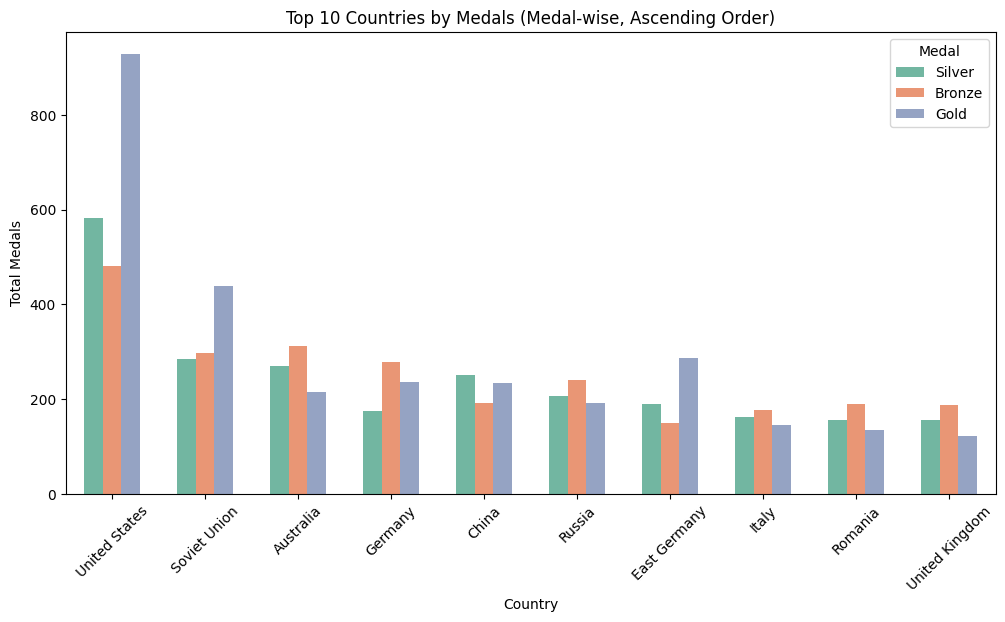

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Get top 10 countries by total medals
top_countries = df['Country'].value_counts().head(10).index

# Step 2: Filter for top countries only
df_top = df[df['Country'].isin(top_countries)]

# Step 3: Sort countries by total medal count (ascending)
country_order = df_top['Country'].value_counts().sort_values(ascending=False).index

# Step 4: Make 'Country' a categorical variable with sorted order
df_top['Country'] = pd.Categorical(df_top['Country'], categories=country_order, ordered=True)

# Step 5: Plot with sorted order
plt.figure(figsize=(12, 6))
sns.countplot(data=df_top, x='Country', hue='Medal', palette='Set2', width=0.6)

plt.title("Top 10 Countries by Medals (Medal-wise, Ascending Order)")
plt.xlabel("Country")
plt.ylabel("Total Medals")
plt.xticks(rotation=45)
#plt.tight_layout()
plt.show()


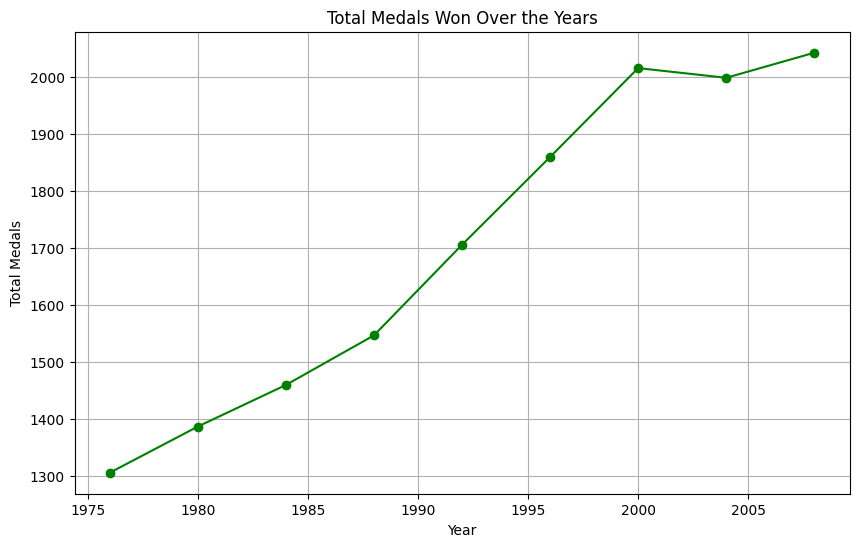

In [14]:
 # Grouping by Year and counting the medals won
medals_over_years = df.groupby('Year')['Medal'].count()
 # Plotting the trend of medals won over the years
plt.figure(figsize=(10, 6))
plt.plot(medals_over_years.index, medals_over_years.values,
marker='o', linestyle='-', color='g')
plt.title("Total Medals Won Over the Years")
plt.xlabel("Year")
plt.ylabel("Total Medals")
plt.grid(True)
plt.show()

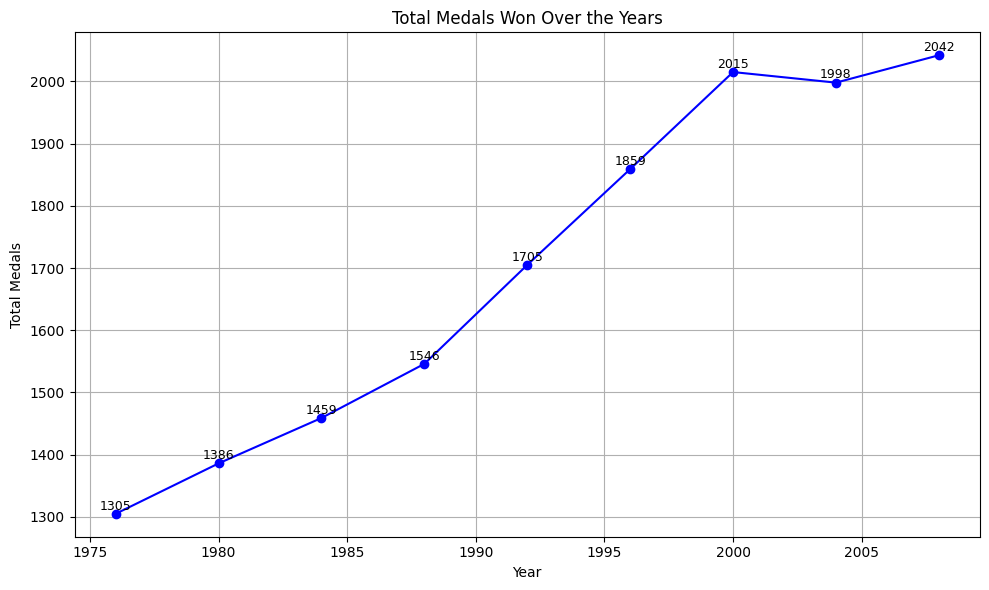

In [15]:
# Grouping by Year and counting the medals won
medals_over_years = df.groupby('Year')['Medal'].count()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot the line chart
plt.plot(medals_over_years.index, medals_over_years.values, marker='o', linestyle='-', color='b')

# Add data labels (values) on each point
for x, y in zip(medals_over_years.index, medals_over_years.values):
    plt.text(x, y + 2, str(y), ha='center', va='bottom', fontsize=9)

# Chart formatting
plt.title("Total Medals Won Over the Years")
plt.xlabel("Year")
plt.ylabel("Total Medals")
plt.grid(True)
plt.tight_layout()
plt.show()


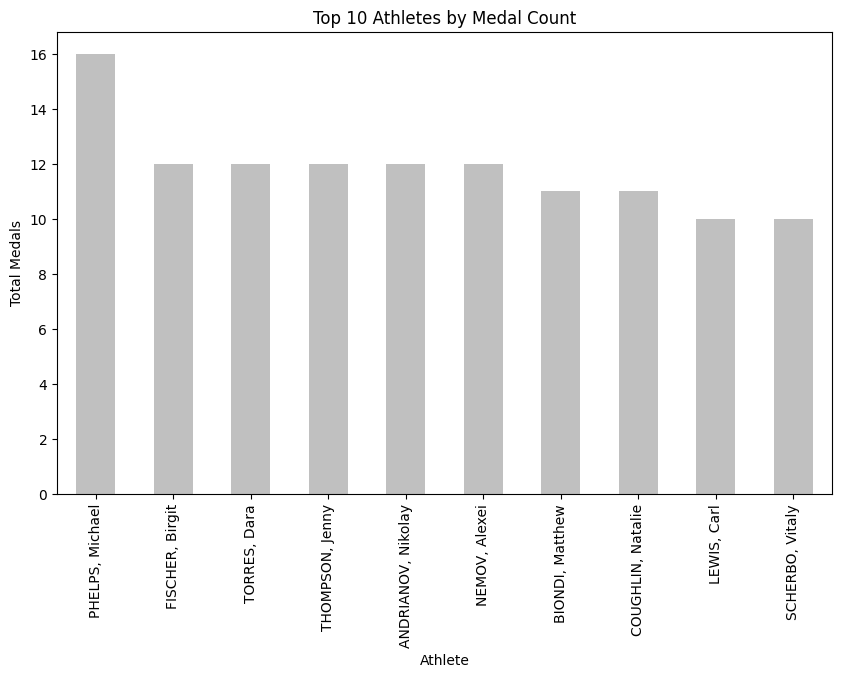

In [4]:
 # Group by Athlete and count the number of medals
athlete_medal_count = df.groupby('Athlete')['Medal'].count().sort_values(ascending=False)
# Plotting the top 10 athletes with most medals
plt.figure(figsize=(10, 6))
athlete_medal_count.head(10).plot(kind='bar', color='silver')
plt.title("Top 10 Athletes by Medal Count")
plt.xlabel("Athlete")
plt.ylabel("Total Medals")
plt.show()


In [ ]:


# Step 1: Group by Athlete and Country, count medals
athlete_medals = df.groupby(['Athlete', 'Country'])['Medal'].count().reset_index()

# Step 2: Sort by medal count
athlete_medals = athlete_medals.sort_values(by='Medal', ascending=False)

# Step 3: Take top 10 and create label like "Athlete (Country)"
athlete_medals['Label'] = athlete_medals['Athlete'] + ' (' + athlete_medals['Country'] + ')'
top_10 = athlete_medals.head(10)

# Step 4: Plot
plt.figure(figsize=(12, 6))
plt.bar(top_10['Label'], top_10['Medal'], color='silver')

plt.title("Top 10 Athletes by Medal Count (with Country)")
plt.xlabel("Athlete (Country)")
plt.ylabel("Total Medals")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [17]:
    
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15315 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15315 non-null  object 
 1   Year          15315 non-null  float64
 2   Sport         15315 non-null  object 
 3   Discipline    15315 non-null  object 
 4   Event         15315 non-null  object 
 5   Athlete       15315 non-null  object 
 6   Gender        15315 non-null  object 
 7   Country_Code  15315 non-null  object 
 8   Country       15315 non-null  object 
 9   Event_gender  15315 non-null  object 
 10  Medal         15315 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.4+ MB


In [18]:
print(df['Medal'].isna().sum())  # Should be 0


0


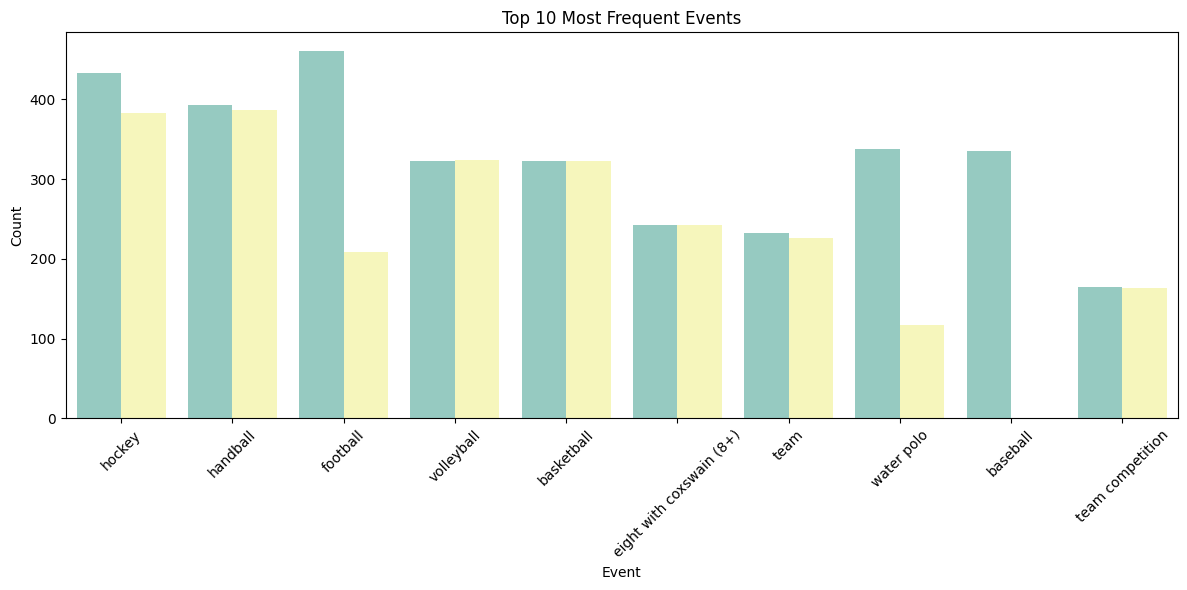

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Top 10 most frequent events
top_10_events = df['Event'].value_counts().nlargest(10).index
df_top_events = df[df['Event'].isin(top_10_events)]

# Plot without hue, suppress legend warning
plt.figure(figsize=(12, 6))
sns.countplot(data=df_top_events,x='Event',order=top_10_events,hue='Gender',palette='Set3',legend=False)
plt.title('Top 10 Most Frequent Events')
plt.xlabel('Event')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [23]:
most_medals_country = df['Country'].value_counts().idxmax()
print("Country with most medals overall:", most_medals_country)

medals_per_year = df[df['Country'] == most_medals_country].groupby('Year')['Medal'].count()
print(medals_per_year)




Country with most medals overall: United States
Year
1976.0    155
1984.0    333
1988.0    193
1992.0    224
1996.0    260
2000.0    248
2004.0    264
2008.0    315
Name: Medal, dtype: int64


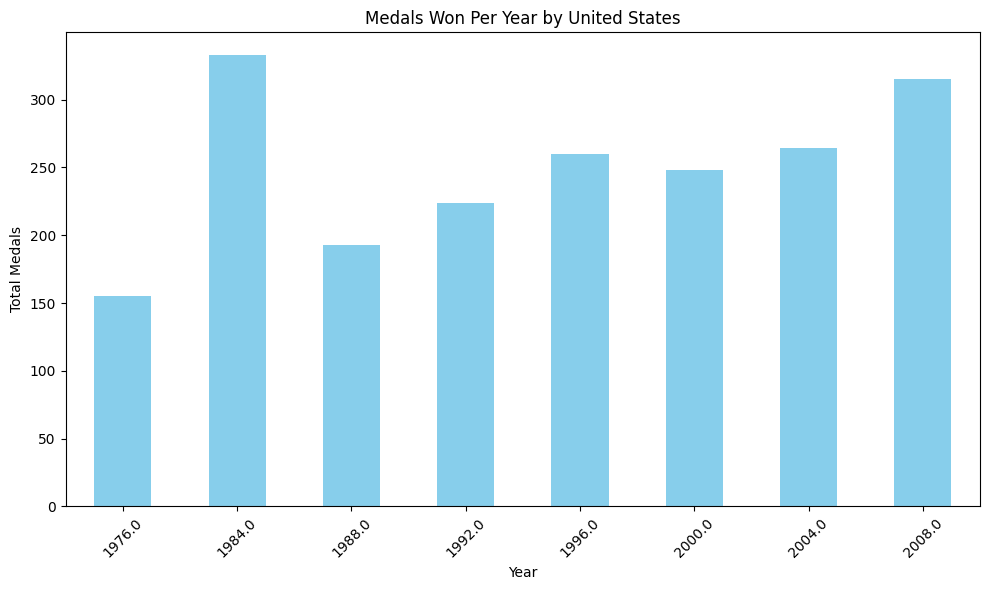

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
medals_per_year.plot(kind='bar', color='skyblue')
plt.title(f"Medals Won Per Year by {most_medals_country}")
plt.xlabel("Year")
plt.ylabel("Total Medals")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


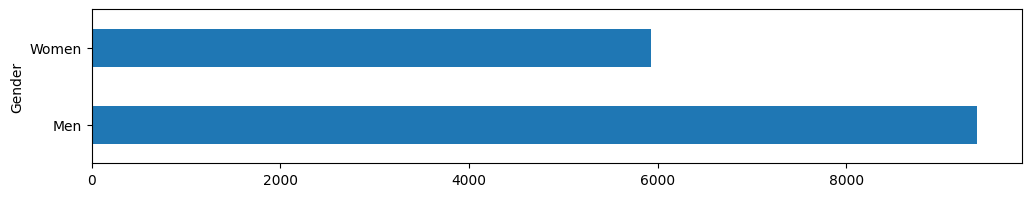

In [26]:
q5_data = df.groupby(['Gender'])['Gender'].count()

plt.figure(figsize = (12,2))
q5_data.plot.barh(x = 'Athlete', y = 'Count')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

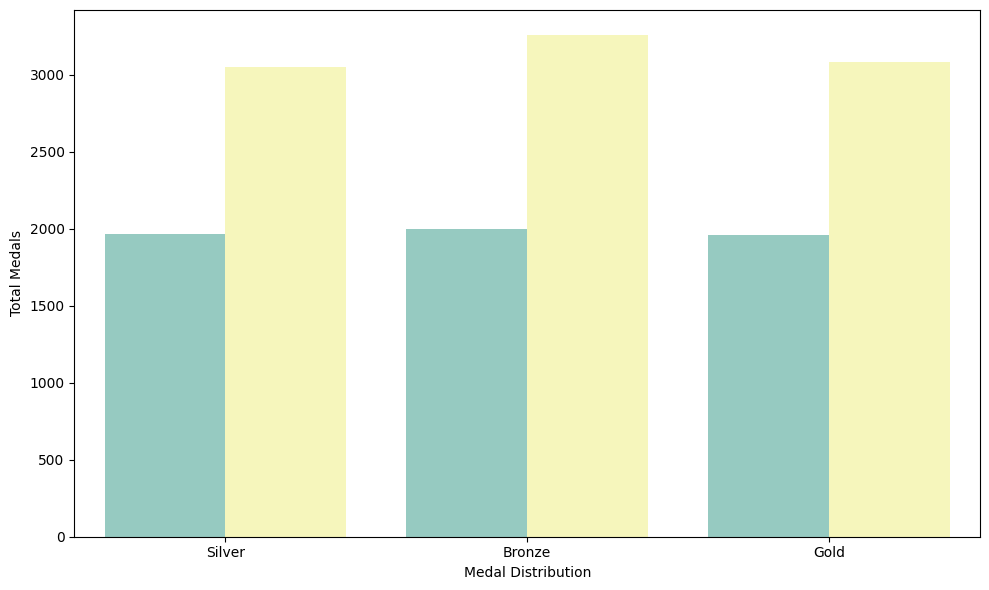

In [28]:

plt.figure(figsize=(10, 6))
sns.countplot(data=df,x='Medal',hue='Gender',palette='Set3',legend=False)
plt.xlabel("Medal Distribution")
plt.ylabel("Total Medals")
plt.tight_layout()
plt.show

In [29]:
q5_data = df[['Event', 'Gender']]
q5_data = q5_data.groupby(['Event','Gender'])['Gender'].count()
print(q5_data)

Event                               Gender
+ 100kg (heavyweight)               Men        16
+ 100kg (super heavyweight)         Men        18
+ 105kg                             Men         9
+ 108kg, total (super heavyweight)  Men         3
+ 110kg, total (super heavyweight)  Men        15
                                             ... 
water polo                          Women     117
épée individual                     Men        27
                                    Women      12
épée team                           Men       114
                                    Women      30
Name: Gender, Length: 379, dtype: int64
